<a href="https://colab.research.google.com/github/MaryamSayedGitHub/Maryam_Sayed_Ahmed-/blob/main/prediction_using_unsupervised_ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import libraries ⛳**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### **Upload Data ⚓**

In [ ]:
data=pd.read_csv("/content/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,0.0,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **EDA: ☔**

### **Showing and handling Nulls ✂**

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Showing the categorical data and convert it to numerical ⚡**

In [ ]:
#Show data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data["Species"].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2],inplace=True)
data["Species"].unique()

array([0, 1, 2])

## **Drop unimportant column ♟**

In [ ]:
data.drop(["Id"],axis=1,inplace=True)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,0.0,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Show Duplicate 

In [ ]:
data.duplicated().sum()

3

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

### **Showing the Outliers and handling :**

<Axes: >

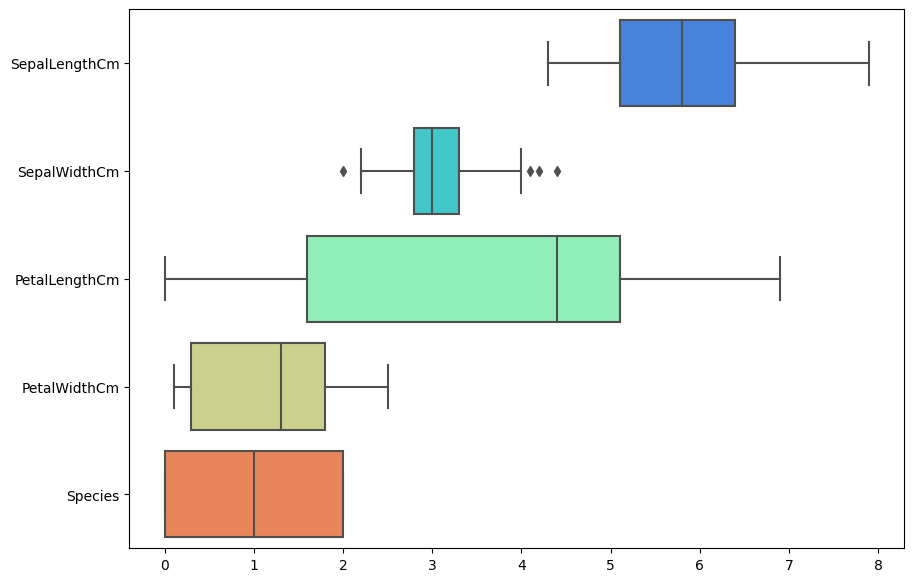

In [ ]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=data,palette='rainbow',orient='h')

<Axes: >

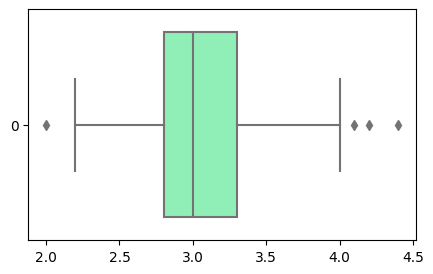

In [ ]:
plt.subplots(figsize=(5,3))
sns.boxplot(data=data["SepalWidthCm"],palette='rainbow',orient='h')

In [ ]:
#Let's try get ride of outliers!
for x in ['SepalWidthCm']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
  
    data.loc[data[x] > max,x] = max
    data.loc[data[x] <min,x] = min

<Axes: >

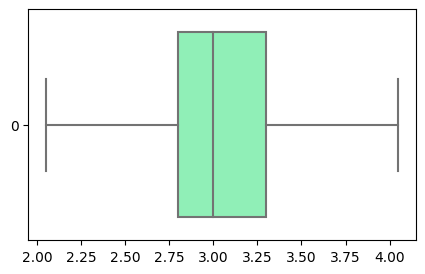

In [ ]:
plt.subplots(figsize=(5,3))
sns.boxplot(data=data["SepalWidthCm"],palette='rainbow',orient='h')

### **Some of Visualizations 🧮**

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,0.0,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


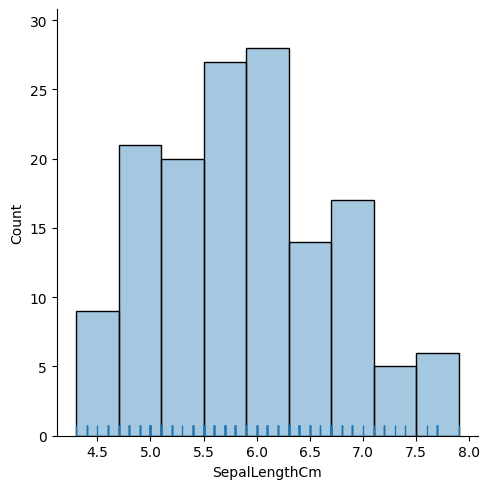

In [ ]:
sns.displot(data, x="SepalLengthCm", alpha=.4, rug=True)

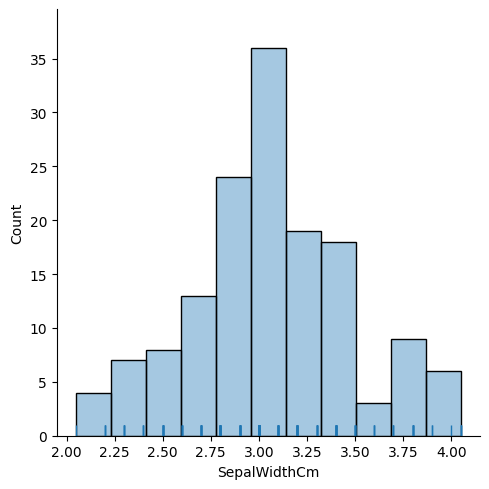

In [ ]:
sns.displot(data, x="SepalWidthCm", alpha=.4, rug=True)

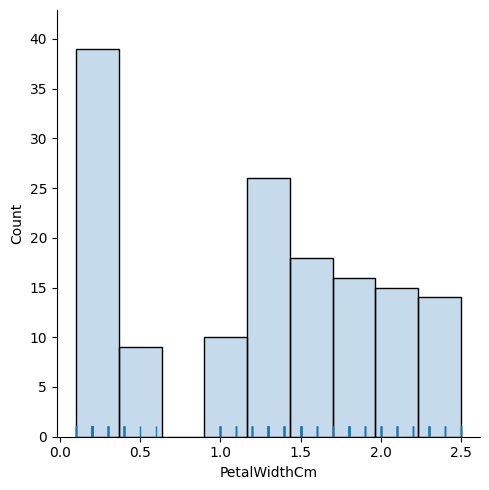

In [ ]:
sns.displot(data, x="PetalWidthCm", alpha=0.26, rug=True)

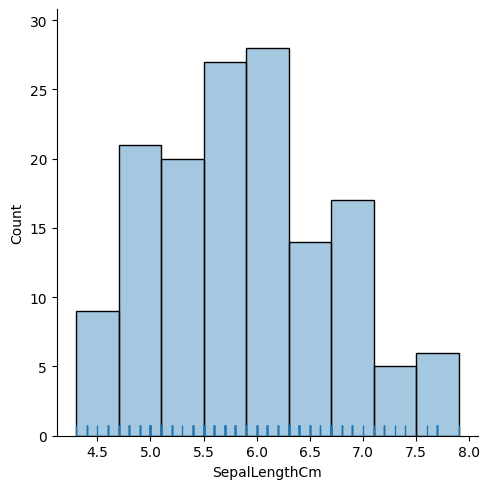

In [ ]:
sns.displot(data, x="SepalLengthCm", alpha=.4, rug=True)

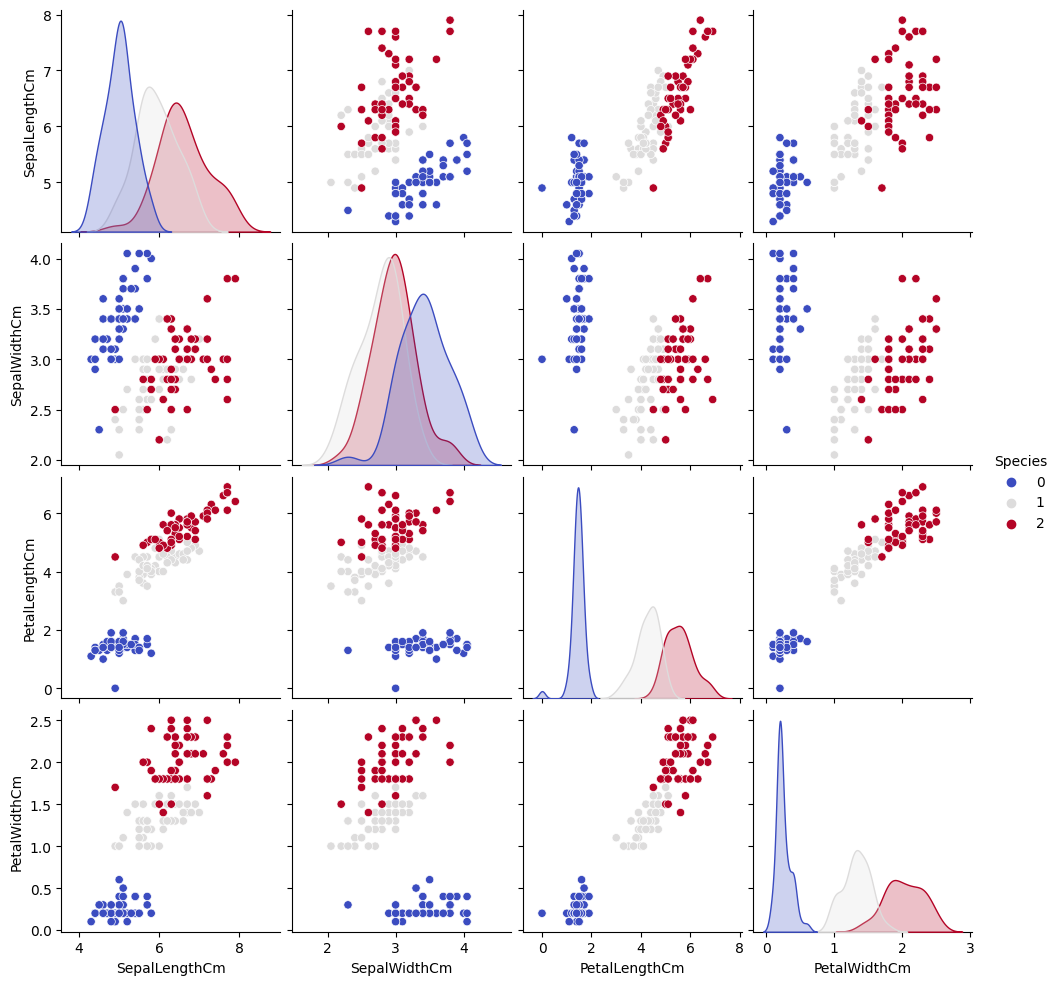

In [ ]:
sns.pairplot(data,hue='Species',palette='coolwarm')

### **Clustering using K_Means **

In [ ]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300,random_state=0)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,0.0,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
y_predicted = kmeans.fit_predict(data[["SepalLengthCm",	"SepalWidthCm"	,"PetalLengthCm"	,"PetalWidthCm"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data['Clusters'] = kmeans.labels_

In [ ]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.41979167, 1.43333333, 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

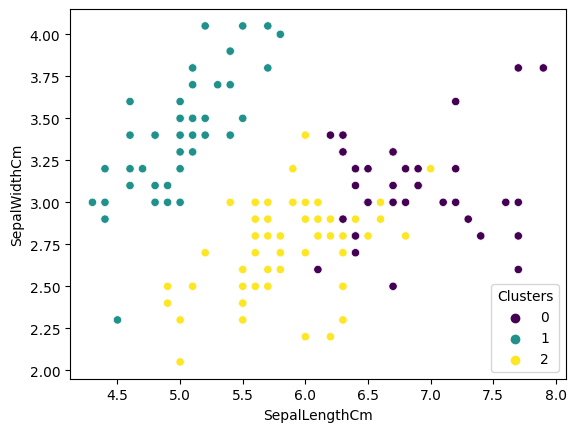

In [ ]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",hue = 'Clusters',  data=data,palette='viridis')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

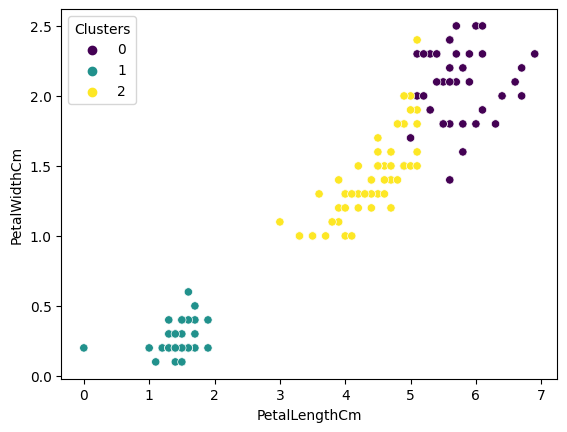

In [ ]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm",hue = 'Clusters',  data=data,palette='viridis')

###** Show the best K-values using Elbow method **

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

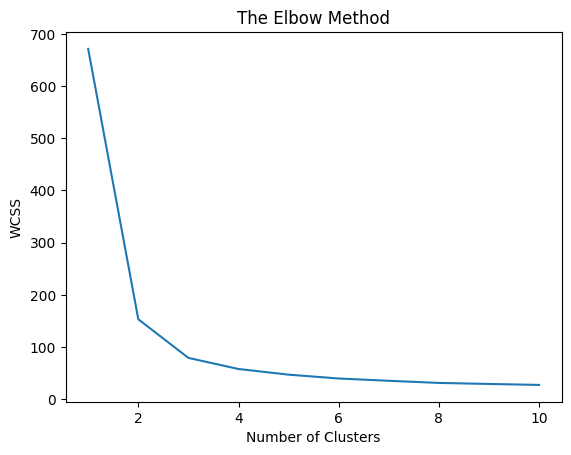

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data[["SepalLengthCm",	"SepalWidthCm"	,"PetalLengthCm"	,"PetalWidthCm"]])
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
data["Clusters"].replace([0,1,2],['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],inplace=True)
data["Clusters"].unique()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

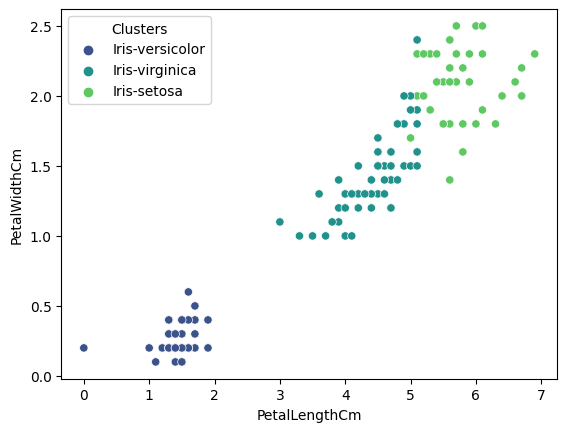

In [ ]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm",hue = 'Clusters',  data=data,palette='viridis')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

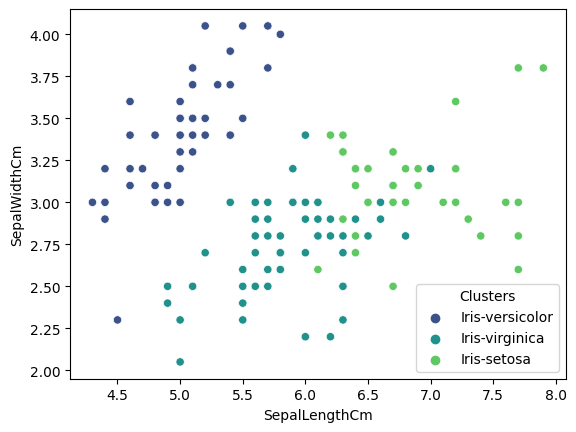

In [ ]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",hue = 'Clusters',  data=data,palette='viridis')

### **Thanks so much 🌳**


### **Waiting for your feedback 😊**